In [ ]:
import pandas as pd
import seaborn as sns
import random
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
BIAIS_SN="biais de somme nulle"
SOMME_ECART_ABSOLU="somme des écarts absolus"

In [ ]:
meta_df=pd.DataFrame(columns=["file", "biais_sn_moyen", "biais_sn_std","biais_sn_min","biais_sn_max","biais_sn_med"])

In [ ]:
def afficher_histogramme_et_enregistrer_stat(file,meta_df,nom_bias,color=None):
    df = pd.read_csv(file,header=None)
    df.columns=[nom_bias]
    sns.displot(df[nom_bias],kde=True,color=color)
    new_row_meta_df= pd.DataFrame(
            [(file,df[nom_bias].mean(),df[nom_bias].std()
             ,df[nom_bias].min()
            ,df[nom_bias].max()
            ,df[nom_bias].median()
             )],
            columns=["file", "biais_sn_moyen", "biais_sn_std","biais_sn_min","biais_sn_max","biais_sn_med"],
        )
    meta_df=pd.concat([meta_df, new_row_meta_df])
    return meta_df

In [ ]:
def afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,nom_bias,color=None):
    for file in liste:
        meta_df=afficher_histogramme_et_enregistrer_stat(file,meta_df,nom_bias,color)
    return meta_df

# Simulations Monte-Carlo

## 1. Scenarios d'ajout cumulés et loi uniforme sur les scores sur un sous-échantillon n tiré aléatoirement de m entités

In [ ]:
l=[random.randint(-10,10) for _ in range(100000)]
sns.histplot(l)

### 1.1 n=10 ajouts et m=12 entités

In [ ]:
liste=["score_clean.csv","score2_clean.csv","score3_clean.csv","score4_clean.csv","score5_clean.csv"]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

### 1.2 n=10 ajouts et m=13 entités

In [ ]:
liste=["13_entities_10_samples/score_13_1_clean.csv",
       "13_entities_10_samples/score_13_2_clean.csv",
       "13_entities_10_samples/score_13_3_clean.csv",
       "13_entities_10_samples/score_13_4_clean.csv",
       "13_entities_10_samples/score_13_5_clean.csv"]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

### 1.3 n=10 ajouts et m=20 entités

In [ ]:
liste=["20_entities_10_samples/score_20_1_clean.csv",
       "20_entities_10_samples/score_20_2_clean.csv",
       "20_entities_10_samples/score_20_3_clean.csv",
       "20_entities_10_samples/score_20_4_clean.csv",
       "20_entities_10_samples/score_20_5_clean.csv"]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

In [ ]:
DIRECTORY="20_entities_10_samples"
liste=["{}/score_20_10_uniform_220831_clean_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

In [ ]:
DIRECTORY="20_entities_10_samples"
liste=["{}/score_20_10_uniform_220831_mea_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

### 1.4 n=10 ajouts et m=100 entités

In [ ]:
liste=["100_entities_10_samples/score_100_10_1_clean.csv",
       "100_entities_10_samples/score_100_10_2_clean.csv",
       "100_entities_10_samples/score_100_10_3_clean.csv",
       "100_entities_10_samples/score_100_10_4_clean.csv",
       "100_entities_10_samples/score_100_10_5_clean.csv"]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

### 1.5 n=10 ajouts et m=1000 entités

In [ ]:
meta_df=afficher_histogramme_et_enregistrer_stat("1000_entities_100_samples/score_1000_100_1_clean.csv",meta_df,BIAIS_SN)

### 1.6 n=1 ajouts et m=20 entités

In [ ]:
DIRECTORY="20_entities_1_samples"
liste=["{}/score_20_1_uniform_220831_clean_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

In [ ]:
DIRECTORY="20_entities_1_samples"
liste=["{}/score_20_1_uniform_220831_mea_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

## 2. Scenarios d'ajout cumulés et loi gaussienne discrète sur les scores sur un sous-échantillon n tiré aléatoirement de m entités

In [ ]:
x = np.arange(-10, 11)
xU, xL = x + 0.5, x - 0.5 
prob = ss.norm.cdf(xU, scale = 3) - ss.norm.cdf(xL, scale = 3)
prob = prob / prob.sum() # normalize the probabilities so their sum is 1
nums = np.random.choice(x, size = 10000, p = prob)
plt.hist(nums, bins = len(x))

### 2.1 n=10 ajouts et m=12 entités

In [ ]:
liste=["score_12_10_gauss_clean_1.csv",
       "score_12_10_gauss_clean_2.csv",
      "score_12_10_gauss_clean_3.csv",
      "score_12_10_gauss_clean_4.csv",
      "score_12_10_gauss_clean_5.csv",]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

### 2.2 n=10 ajouts et m=20 entités

In [ ]:
liste=["20_entities_10_samples/score_20_10_gauss_clean_1.csv",
      "20_entities_10_samples/score_20_10_gauss_clean_2.csv",
      "20_entities_10_samples/score_20_10_gauss_clean_3.csv",
      "20_entities_10_samples/score_20_10_gauss_clean_4.csv",
      "20_entities_10_samples/score_20_10_gauss_clean_5.csv",
      "20_entities_10_samples/score_20_10_gauss_clean_6.csv"]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

In [ ]:
DIRECTORY="20_entities_10_samples"
liste=["{}/score_20_10_gauss_220830_clean_{}.csv".format(DIRECTORY,i) for i in range(1,11)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

In [ ]:
DIRECTORY="20_entities_10_samples"
liste=["{}/score_20_10_gauss_220830_mea_{}.csv".format(DIRECTORY,i) for i in range(1,11)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

### 2.3 n=10 ajouts et m=100 entités

In [ ]:
liste=["100_entities_10_samples/score_100_10_gauss_clean_1.csv",
       "100_entities_10_samples/score_100_10_gauss_clean_2.csv",
       "100_entities_10_samples/score_100_10_gauss_clean_3.csv",
       "100_entities_10_samples/score_100_10_gauss_clean_4.csv",
       "100_entities_10_samples/score_100_10_gauss_clean_5.csv",
      ]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

### 2.4 n=1 ajouts et m=20 entités

In [ ]:
DIRECTORY="20_entities_1_samples"
liste=["{}/score_20_1_gauss_220830_clean_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

In [ ]:
DIRECTORY="20_entities_1_samples"
liste=["{}/score_20_1_gauss_220830_mea_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

### 2.5 n=5 ajouts et m=20 entités

In [ ]:
DIRECTORY="20_entities_5_samples"
liste=["{}/score_20_5_gauss_220830_clean_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

In [ ]:
DIRECTORY="20_entities_5_samples"
liste=["{}/score_20_5_gauss_220830_mea_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

## 3. Scenarios d'ajout cumulés et de deux loi gaussiennes discrètes centrées sur les bornes sur les scores sur un sous-échantillon n tiré aléatoirement de m entités

In [ ]:
x = np.arange(-10, 11)
prob= np.array([0.13242928, 0.12533694,
 0.1062586,  0.08069342, 0.05489084, 0.03344625, 0.01825486, 0.00892463,
 0.00390822, 0.00153299,
0.00053861, 0.00153299, 0.00390822, 0.00892463, 0.01825486, 0.03344625,
 0.05489084, 0.08069342, 0.1062586,  0.12533694, 0.13242928])
prob = prob / prob.sum()
nums = np.random.choice(x, size = 10000, p = prob)
plt.hist(nums, bins = len(x))

### 3.1 n=10 ajouts et m=12 entités

In [ ]:
liste=["score_12_10_inversegauss_clean_1.csv",
       "score_12_10_inversegauss_clean_2.csv",
      "score_12_10_inversegauss_clean_3.csv",
      "score_12_10_inversegauss_clean_4.csv",
      "score_12_10_inversegauss_clean_5.csv",]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

In [ ]:
liste=["score_12_10_inversegauss_mea_clean_1.csv",
       "score_12_10_inversegauss_mea_clean_2.csv",
      "score_12_10_inversegauss_mea_clean_3.csv",
      "score_12_10_inversegauss_mea_clean_4.csv",
      "score_12_10_inversegauss_mea_clean_5.csv",]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

### 3.2 n=10 ajouts et m=100 entités

In [ ]:
liste=["100_entities_10_samples/score_100_10_inversegauss_clean_1.csv",
      "100_entities_10_samples/score_100_10_inversegauss_clean_2.csv",
      "100_entities_10_samples/score_100_10_inversegauss_clean_3.csv",
      "100_entities_10_samples/score_100_10_inversegauss_clean_4.csv",
      "100_entities_10_samples/score_100_10_inversegauss_clean_5.csv"]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

### 3.3 n=100 ajouts et m=1000 entités

In [ ]:
meta_df=afficher_histogramme_et_enregistrer_stat("1000_entities_100_samples/score_1000_100_inversegauss_220828_clean_431.csv",meta_df,BIAIS_SN)

In [ ]:
meta_df=afficher_histogramme_et_enregistrer_stat("1000_entities_100_samples/score_1000_100_inversegauss_mea_220828_clean_431.csv",meta_df,SOMME_ECART_ABSOLU,color="red")

### 3.4 n=100 ajouts et m=20 entités

In [ ]:
meta_df=afficher_histogramme_et_enregistrer_stat("score_20_100_inversegauss_220830.csv",meta_df,BIAIS_SN)

In [ ]:
meta_df=afficher_histogramme_et_enregistrer_stat("score_20_100_inversegauss_mea_220830.csv",meta_df,SOMME_ECART_ABSOLU,color="red")

### 3.5 n=1 ajouts et m=20 entités

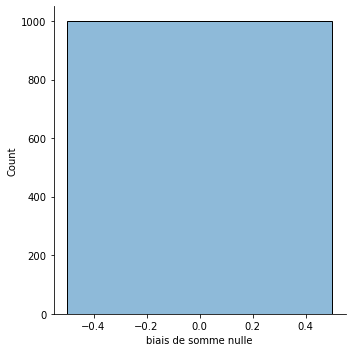

In [34]:
DIRECTORY="20_entities_1_samples"
liste=["{}/score_20_1_inversegauss_220830_clean_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

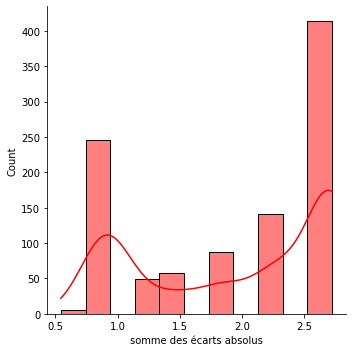

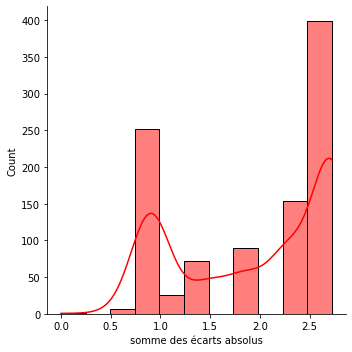

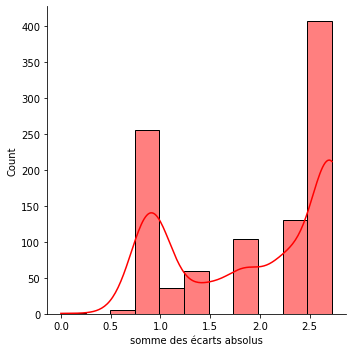

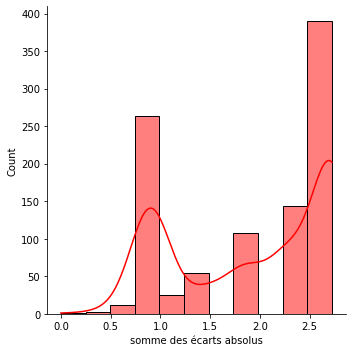

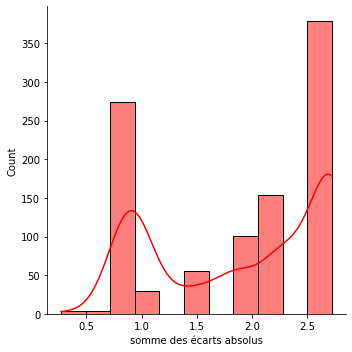

In [35]:
DIRECTORY="20_entities_1_samples"
liste=["{}/score_20_1_inversegauss_mea_220830_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

### 3.6 n=5 ajouts et m=20 entités

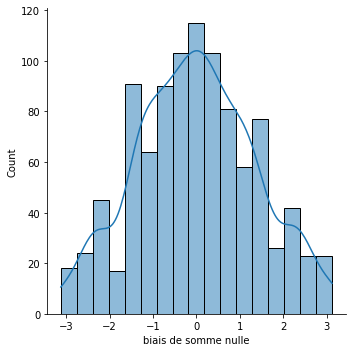

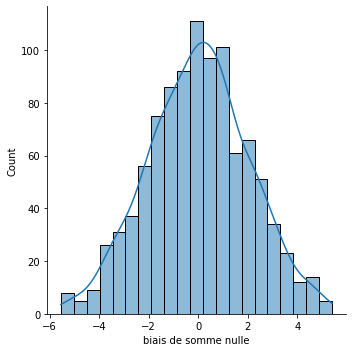

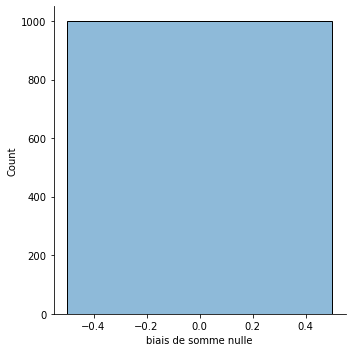

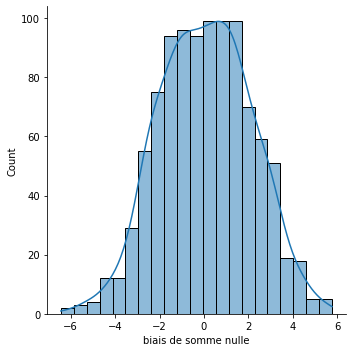

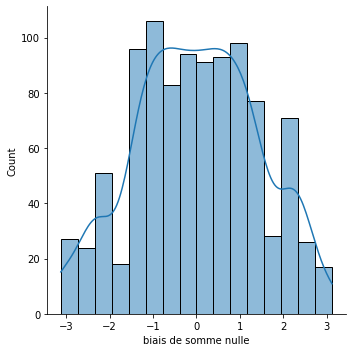

In [36]:
DIRECTORY="20_entities_5_samples"
liste=["{}/score_20_5_inversegauss_clean_220830_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

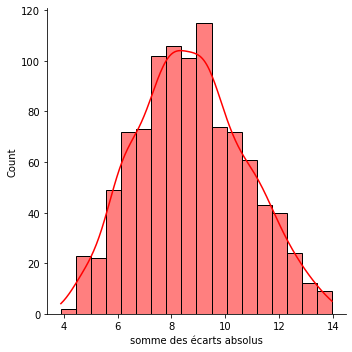

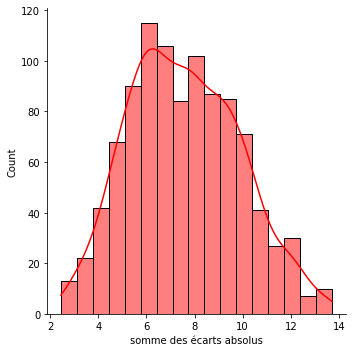

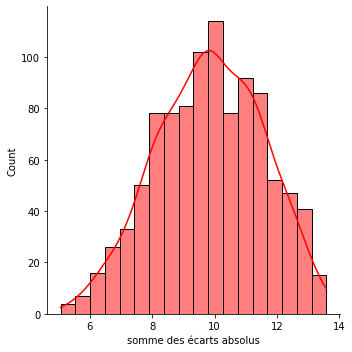

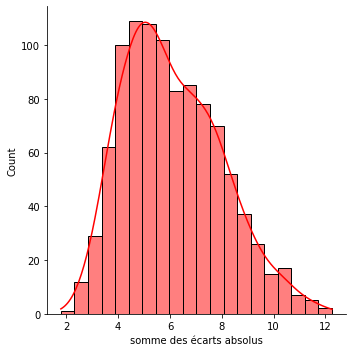

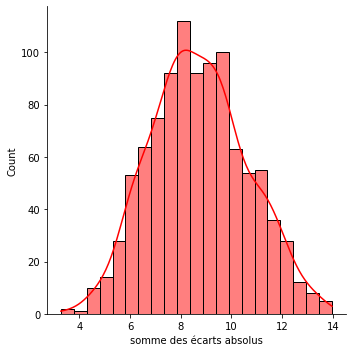

In [37]:
DIRECTORY="20_entities_5_samples"
liste=["{}/score_20_5_inversegauss_mea_220830_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

### 3.7 n=10 ajouts et m=20 entités

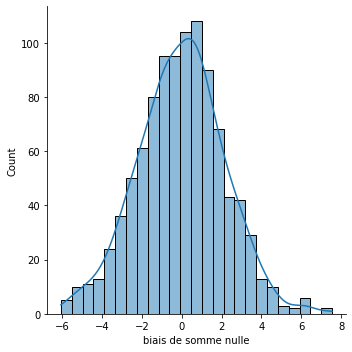

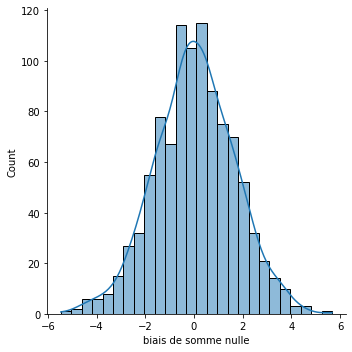

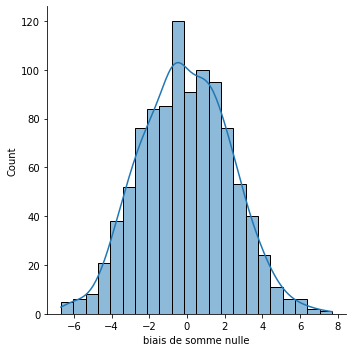

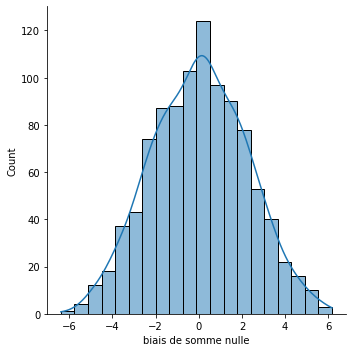

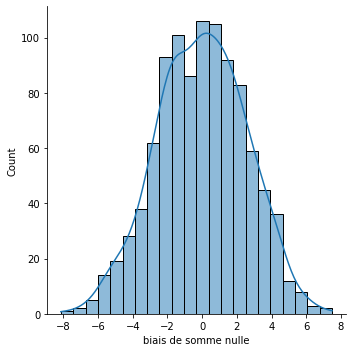

In [38]:
DIRECTORY="20_entities_10_samples"
liste=["{}/score_20_10_inversegauss_clean_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

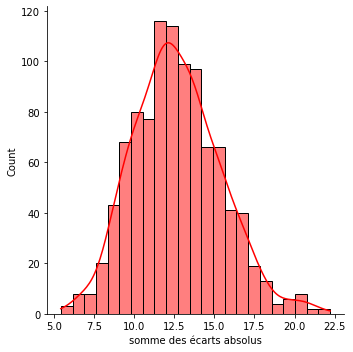

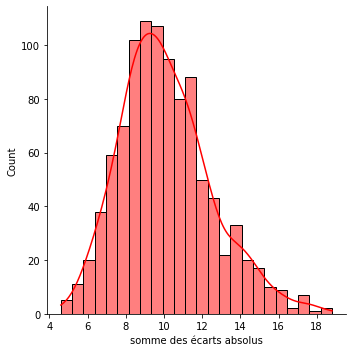

In [ ]:
DIRECTORY="20_entities_10_samples"
liste=["{}/score_20_10_inversegauss_mea_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

In [ ]:
meta_df